## Chap 4: Aggregating and describing your data by category 

Median market capitalization by sector

Aggregate data is data combined from several measurements. As you learned in the video, the .groupby() function is helpful in aggregating your data by a specific category.

You have seen previously that the market capitalization data has large outliers. To get a more robust summary of the market value of companies in each sector, you will calculate the median market capitalization by sector.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 7 columns):
Stock Symbol             3147 non-null object
Company Name             3147 non-null object
Last Sale                3079 non-null float64
Market Capitalization    3147 non-null float64
IPO Year                 1361 non-null float64
Sector                   2177 non-null object
Industry                 2177 non-null object
dtypes: float64(3), object(4)
memory usage: 172.2+ KB


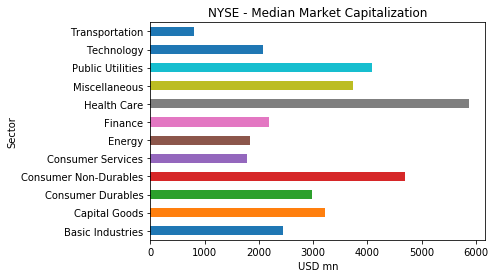

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
nyse = pd.read_excel('listings.xlsx', sheet_name='nyse', na_values='n/a')


# Inspect NYSE data
nyse.info()

# Create market_cap_m
nyse['market_cap_m'] = nyse['Market Capitalization'].div(1e6)

# Drop market cap column
nyse = nyse.drop('Market Capitalization', axis=1)

# Group nyse by sector
mcap_by_sector = nyse.groupby('Sector')

# Calculate median
median_mcap_by_sector = mcap_by_sector.market_cap_m.median()

# Plot and show as horizontal bar chart
median_mcap_by_sector.plot(kind='barh', title='NYSE - Median Market Capitalization')

# Add the label
plt.xlabel('USD mn')

# Show the plot
plt.show()

Median market capitalization by IPO year

In the last lesson of the previous chapter, you created a timeline for the number of IPOs per year for technology companies.

Let's now analyze how market capitalization has evolved for different IPO years. You can combine data from all three exchanges to get a more comprehensive view.

Median market capitalization by IPO year

In the last lesson of the previous chapter, you created a timeline for the number of IPOs per year for technology companies.

Let's now analyze how market capitalization has evolved for different IPO years. You can combine data from all three exchanges to get a more comprehensive view.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6674 entries, 0 to 3146
Data columns (total 8 columns):
Stock Symbol             6674 non-null object
Company Name             6674 non-null object
Last Sale                6590 non-null float64
Market Capitalization    6674 non-null float64
IPO Year                 2852 non-null float64
Sector                   5182 non-null object
Industry                 5182 non-null object
Exchange                 6674 non-null object
dtypes: float64(3), object(5)
memory usage: 469.3+ KB
     Stock Symbol                                       Company Name  \
0            XXII                            22nd Century Group, Inc   
1             FAX              Aberdeen Asia-Pacific Income Fund Inc   
2             IAF                 Aberdeen Australia Equity Fund Inc   
3              CH                          Aberdeen Chile Fund, Inc.   
4  ABE             Aberdeen Emerging Markets Smaller Company Oppo...   

   Last Sale  Market Capitalization 

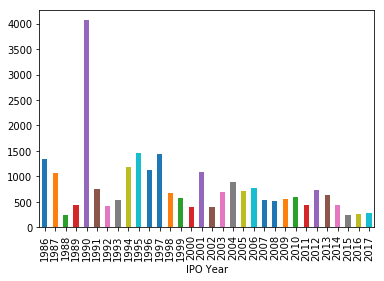

In [12]:

# Create the pd.ExcelFile() object
xls = pd.ExcelFile('listings.xlsx')

# Extract the sheet names from xls
exchanges = xls.sheet_names

# Create an empty list: listings
listings=[]

# Import the data
for exchange in exchanges:
    listing = pd.read_excel(xls, sheet_name=exchange, na_values='n/a')
    listing['Exchange'] = exchange
    listings.append(listing)

# Concatenate the listings: listing_data
listings = pd.concat(listings)

# Inspect listings
listings.info()

# Show listings head
print(listings.head())

# Create market_cap_m
listings['market_cap_m'] = listings['Market Capitalization'].div(1e6)

# Select companies with IPO after 1985
listings = listings[listings['IPO Year'] > 1985]

# Drop missing values and convert to integers
listings['IPO Year'] = listings['IPO Year'].dropna().astype(int)

# Calculate the median market cap by IPO Year and sort the index
ipo_by_year = listings.groupby('IPO Year').market_cap_m.median().sort_index()

# Plot results as a bar chart
ipo_by_year.plot(kind='bar')

# Show the plot
plt.show()

In [14]:
nasdaq = pd.read_excel('listings.xlsx', sheet_name='nasdaq', na_values='n/a')

# Inspect NASDAQ data
nasdaq.info()

# Create market_cap_m
nasdaq['market_cap_m'] = nasdaq['Market Capitalization'].div(1e6)

# Drop the Market Capitalization column
nasdaq.drop('Market Capitalization', axis=1, inplace=True)

# Group nasdaq by Sector
nasdaq_by_sector = nasdaq.groupby('Sector')

# Create summary statistics by sector
summary = nasdaq_by_sector.describe()

# Print the summary
print(summary)

# Unstack 
summary = summary.unstack()

# Print the summary again
print(summary)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167 entries, 0 to 3166
Data columns (total 7 columns):
Stock Symbol             3167 non-null object
Company Name             3167 non-null object
Last Sale                3165 non-null float64
Market Capitalization    3167 non-null float64
IPO Year                 1386 non-null float64
Sector                   2767 non-null object
Industry                 2767 non-null object
dtypes: float64(3), object(4)
memory usage: 173.3+ KB
                      IPO Year                                           \
                         count         mean        std     min      25%   
Sector                                                                    
Basic Industries          30.0  2000.766667  12.516701  1972.0  1993.25   
Capital Goods             77.0  2001.324675  10.593495  1972.0  1993.00   
Consumer Durables         36.0  2003.222222   9.908470  1983.0  1994.75   
Consumer Non-Durables     41.0  2000.609756  11.060918  1972.0  1

Company value by exchange and sector

You can generate more fine-grained summaries of your data by providing a list of columns inside .groupby() and/or applying a statistical method such as .mean() directly to one or more numerical columns.

Here, you will calculate the median market capitalization for each sector, differentiated by the exchange that the companies are listed on. You will also use .unstack() to pivot the exchange labels from the rows into the columns. It's a good idea to inspect listings in your console before starting the exercise!

Sector            Exchange
Basic Industries  amex         137.318135
                  nasdaq       169.181116
                  nyse        1672.751912
Capital Goods     amex         107.390617
                  nasdaq       477.069539
Name: market_cap_m, dtype: float64


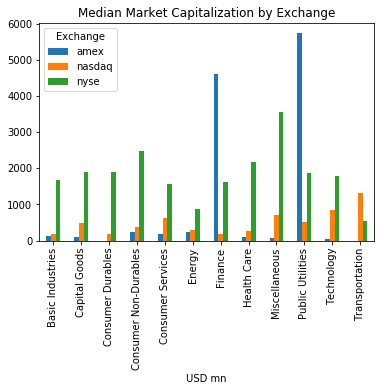

In [15]:
# Group listings by Sector and Exchange
by_sector_exchange = listings.groupby(['Sector', 'Exchange'])

# Calculate the median market cap
mcap_by_sector_exchange = by_sector_exchange.market_cap_m.median()

# Display the head of the result
print(mcap_by_sector_exchange.head())

# Unstack mcap_by_sector_exchange
mcap_unstacked = mcap_by_sector_exchange.unstack()

# Plot as a bar chart
mcap_unstacked.plot(kind='bar', title='Median Market Capitalization by Exchange')

# Set the x label
plt.xlabel('USD mn')


# Show the plot
plt.show()

Calculate several metrics by sector and exchange

The .agg() function allows you to aggregate your data in even more ways by accepting two kinds of arguments. Providing a list of names of statistical methods calculates more than one summary statistic at once, and providing a dictionary where keys are column names and values are statistical methods applies a particular summary statistic to a designated column.

In this exercise, you will calculate the mean, median, and standard deviation of market capitalizations in millions of USD

In [16]:
# Create market_cap_m
listings['market_cap_m'] = listings['Market Capitalization'].div(1e6)

# Group listing by both Sector and Exchange
by_sector_exchange = listings.groupby(['Sector', 'Exchange'])

# Subset market_cap_m of by_sector_exchange
bse_mcm = by_sector_exchange['market_cap_m']

# Calculate mean, median, and std in summary
summary = bse_mcm.agg({'Average': 'mean', 'Median': 'median', 'Standard Deviation': 'std'})

# Print the summary
print(summary)

                                     Average       Median  Standard Deviation
Sector                Exchange                                               
Basic Industries      amex        374.323921   137.318135          709.618981
                      nasdaq      824.788760   169.181116         1937.492260
                      nyse       4192.727667  1672.751912         9126.659431
Capital Goods         amex        148.943096   107.390617           95.611487
                      nasdaq     2031.734096   477.069539         6593.280268
                      nyse       5746.444596  1898.473017         8272.670181
Consumer Durables     nasdaq     1045.413873   178.278939         2493.971323
                      nyse       2926.061359  1888.834676         3083.301891
Consumer Non-Durables amex        237.644444   237.644444                 NaN
                      nasdaq     1258.570987   367.018066         1844.221028
                      nyse       6473.559842  2479.639848       

/home/prashant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  # This is added back by InteractiveShellApp.init_path()


Plot IPO timeline for all exchanges using countplot()

To create a basic visualization of the number of observations per category in a dataset, the seaborn countplot() function is usually the way to go:

seaborn.countplot(x=None, hue=None, data=None, ...)

The x parameter contains the names of the variables in the data argument, which is the DataFrame to be plotted. hue identifies an additional categorical variable with color. These are three optional parameters out of many accepted by the function; for a full list, check out the seaborn documentation.

Let's use this tool to compare the timeline of IPO activity across the three exchanges.

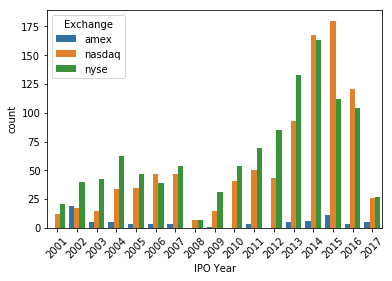

In [18]:
import seaborn as sns

# Select IPOs after 2000
listings = listings[listings['IPO Year'] > 2000]

# Convert IPO Year to integer
listings['IPO Year'] = listings['IPO Year'].astype(int)

# Create a countplot
sns.countplot(x='IPO Year', hue='Exchange', data=listings)

# Rotate xticks and show result
plt.xticks(rotation=45)

# Show the plot
plt.show()

Global median per capita income over time

The seaborn barplot() function shows point estimates and confidence intervals as rectangular bars; the default function displays the mean, but it can also represent another summary statistic if you pass a particular numpy function to its estimator parameter:

seaborn.barplot(x=None, y=None, data=None, estimator=<function mean>, ...)

In this exercise, you will use an imported World Bank dataset containing global income per capita data for 189 countries since the year 2000. To practice displaying of summary statistics per category, you will plot and compare the median global income per capita since 2000 to the mean.

In [22]:
# Inspect the data
income_trend.info()

# Create barplot
sns.barplot(x='Year', y='Income per Capita', data=income_trend)

# Rotate xticks
plt.xticks(rotation=45)

# Show the plot
plt.show()

# Close the plot
plt.close()

# Create second barplot
sns.barplot(x='Year', y='Income per Capita', data=income_trend, estimator=np.median)

# Rotate xticks
plt.xticks(rotation=45)

# Show the plot
plt.show()


,Country,Income per Capita
0,Afghanistan,1925.165228
1,Albania,11479.087460
2,Algeria,14688.203300
3,Angola,7386.700843
4,Antigua and Barbuda,23062.278270
5,Argentina,20338.189060
6,Armenia,8418.727790
7,Australia,46270.799340
8,Austria,49429.555550
9,Azerbaijan,17779.773760


Calculate several metrics by sector and IPO year

The seaborn pointplot() function facilitates the comparison of summary statistics of a numerical variable for different levels of categorical variables:

seaborn.pointplot(x=None, y=None, hue=None, data=None, ...)

In the video, you saw a visualization for the market capitalization (the numerical variable) differentiated by whether the IPO (the categorical variable) occurred before (first level) or after (second level) the year 2000.

In this exercise, you will compare the mean market capitalization for each year since 2000 for the NYSE and the NASDAQ, after excluding outliers beyond the 95th percentile.

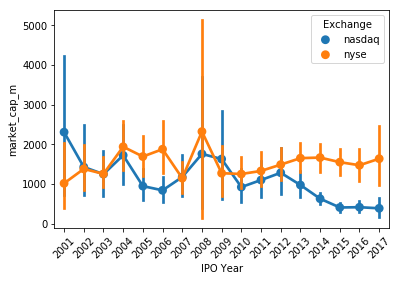

In [24]:
# Import the seaborn library as sns
import seaborn as sns

# Exclude IPOs before 2000 and from the 'amex'
listings = listings[(listings['IPO Year'] > 2000) & (listings.Exchange != 'amex')]

# Convert IPO Year to integer
listings['IPO Year'] = listings['IPO Year'].astype(int)

# Create market_cap_m
listings['market_cap_m'] = listings['Market Capitalization'].div(1e6)

# Exclude outliers
listings = listings[listings.market_cap_m < listings.market_cap_m.quantile(.95)]

# Create the pointplot
sns.pointplot(x='IPO Year', y='market_cap_m', hue='Exchange', data=listings)

# Rotate xticks
plt.xticks(rotation=45)

# Show the plot
plt.show()

Inflation trends in China, India, and the US

Finally, the seaborn package includes functions that allow you to visualize the distribution of levels of categorical variables.

In the next two exercises, you will examine the historical inflation data in China, India, and the US over the past 50+ years in data from FRED. Before jumping into using the functions you have just learned, you should first familiarize yourself with the raw data.

In [ ]:
# Inspect the inflation data
inflation.info()

# Create inflation_by_country
inflation_by_country = inflation.groupby('Country')

# Iterate over inflation_by_country and plot the inflation time series per country
for country, data in inflation_by_country:
    # Plot the data
    data.plot(title=country)
    # Show the plot
    plt.show()

In [ ]:
# Create boxplot
sns.boxplot(x='Country', y='Inflation', data=inflation)

# Show the plot
plt.show()

# Close the plot
plt.close()

# Create swarmplot
sns.swarmplot(x='Country', y='Inflation', data=inflation)

# Show the plot
plt.show()